# WeatherPy
----

### Analysis
* The temperature tends to increase as the latitude approaches the Equator (0 Deg. Latitude). Cities with higher latitudes (northern hemisphere) tend to be colder at the time of the analysis (January).
* Latitude and humidity do not appear to have a strong correlation. There a band of cities that have close to 100% humidity at the time of the analysis.
* Latitude and cloudiness do not appear to have a strong correlation. There is a band of cities with 0, 20 and 40% cloudiness at the time of the analysis.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" #Fahrenheit

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [27]:
#Set up lists to hold reponse info
new_cities = []
lat = []
lon = []
temp = []
humid = []
cloud = []
wind = []
cityid = []

search_count = 1

#Perform API calls for each city, and append to lists
print('Beginning Data Retrieval')
print('------------------------')
for city in cities:
    print(f'Processing record {search_count} for city: {city}')
    city = city.replace(' ', '+')
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print(query_url + city)
        new_cities.append(city)
    except:
        print(f'Missing data for city: {city}')
    search_count += 1

print('------------------------')
print('Data Retrieval Complete')
print('------------------------')

Beginning Data Retrieval
------------------------
Processing record 1 for city: busselton
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=busselton
Processing record 2 for city: beruni
Missing data for city: beruni
Processing record 3 for city: ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=ribeira+grande
Processing record 4 for city: sao joao da barra
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=sao+joao+da+barra
Processing record 5 for city: bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=bredasdorp
Processing record 6 for city: rikitea
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=rikitea
Processing record 7 for city: evensk
http://api.openweathermap.org/data/2.5/weather?appid=4f7e

Missing data for city: bengkulu
Processing record 58 for city: kita
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=kita
Processing record 59 for city: new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=new+norfolk
Processing record 60 for city: nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=nanortalik
Processing record 61 for city: saint george
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=saint+george
Processing record 62 for city: cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=cherskiy
Processing record 63 for city: huangchuan
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=huangchuan
Processing record 64 for city: fortuna
htt

http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=ryomgard
Processing record 121 for city: mount isa
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=mount+isa
Processing record 122 for city: yatou
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=yatou
Processing record 123 for city: kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=kruisfontein
Processing record 124 for city: ancud
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=ancud
Processing record 125 for city: grants
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=grants
Processing record 126 for city: swan river
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&

Missing data for city: catamarca
Processing record 179 for city: cardonal
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=cardonal
Processing record 180 for city: saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=saint-pierre
Processing record 181 for city: champerico
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=champerico
Processing record 182 for city: nhulunbuy
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=nhulunbuy
Processing record 183 for city: makakilo city
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=makakilo+city
Processing record 184 for city: bako
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=bako
Processing record 185 for city: w

http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=ubinskoye
Processing record 238 for city: nusaybin
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=nusaybin
Processing record 239 for city: wattegama
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=wattegama
Processing record 240 for city: mitsamiouli
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=mitsamiouli
Processing record 241 for city: pisco
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=pisco
Processing record 242 for city: talara
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=talara
Processing record 243 for city: iraray
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2

http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=pangnirtung
Processing record 293 for city: muros
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=muros
Processing record 294 for city: nouadhibou
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=nouadhibou
Processing record 295 for city: boyuibe
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=boyuibe
Processing record 296 for city: hamilton
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=hamilton
Processing record 297 for city: manuk mangkaw
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=manuk+mangkaw
Processing record 298 for city: handan
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f6

http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=monrovia
Processing record 348 for city: pauini
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=pauini
Processing record 349 for city: ketchikan
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=ketchikan
Processing record 350 for city: vaitupu
Missing data for city: vaitupu
Processing record 351 for city: wajima
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=wajima
Processing record 352 for city: narsaq
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=narsaq
Processing record 353 for city: chichihualco
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=chichihualco
Processing record 354 for city: coahuayana
http://api.

http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=egvekinot
Processing record 407 for city: raudeberg
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=raudeberg
Processing record 408 for city: ak-dovurak
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=ak-dovurak
Processing record 409 for city: bongandanga
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=bongandanga
Processing record 410 for city: itacarambi
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=itacarambi
Processing record 411 for city: carballo
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=carballo
Processing record 412 for city: luderitz
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca

http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=hofn
Processing record 463 for city: codajas
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=codajas
Processing record 464 for city: richards bay
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=richards+bay
Processing record 465 for city: eucaliptus
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=eucaliptus
Processing record 466 for city: redmond
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=redmond
Processing record 467 for city: kiruna
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=kiruna
Processing record 468 for city: sataua
Missing data for city: sataua
Processing record 469 for city: thinadhoo
http://api.o

http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=clinton
Processing record 523 for city: waingapu
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=waingapu
Processing record 524 for city: dumas
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=dumas
Processing record 525 for city: la plata
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=la+plata
Processing record 526 for city: burns lake
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=burns+lake
Processing record 527 for city: college
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=college
Processing record 528 for city: dmitriyev-lgovskiy
Missing data for city: dmitriyev-lgovskiy
Processing record 529 for city: gho

http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=itupiranga
Processing record 581 for city: los altos
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=los+altos
Processing record 582 for city: tura
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=tura
Processing record 583 for city: waipawa
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=waipawa
Processing record 584 for city: lazarev
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=lazarev
Processing record 585 for city: mildura
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=imperial&q=mildura
Processing record 586 for city: nabire
http://api.openweathermap.org/data/2.5/weather?appid=4f7e36489aca5ebaac26f667d408cde2&units=im

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
#Create and format data frame
weather_dict = {'City': new_cities, 'Latitude': lat, 'Longitude': lon, 'Temperature (˚F)': temp, 'Humidity (%)': humid, 'Cloudiness (%)': cloud, 'Wind Speed (mph)': wind}

weather_data = pd.DataFrame(weather_dict)

weather_data['City'] = weather_data['City'].str.replace('+',' ')

weather_data.head(10)

,City,Latitude,Longitude,Temperature (˚F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,busselton,-33.64,115.35,62.66,100,0,15.59
1,ribeira grande,38.52,-28.70,60.80,77,75,13.87
2,sao joao da barra,-21.64,-41.05,91.40,46,20,18.34
3,bredasdorp,-34.53,20.04,73.40,69,36,18.34
4,rikitea,-23.12,-134.97,78.90,100,36,11.23
5,evensk,61.92,159.24,-9.21,100,64,7.99
6,carnarvon,-30.97,22.13,78.41,16,0,7.76
7,east london,-33.02,27.91,69.80,77,75,12.75
8,yellowknife,62.45,-114.38,-4.01,83,75,19.46
9,avarua,-21.21,-159.78,80.60,88,75,18.34


In [29]:
#Save data frame to CSV
weather_data.to_csv('cities.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

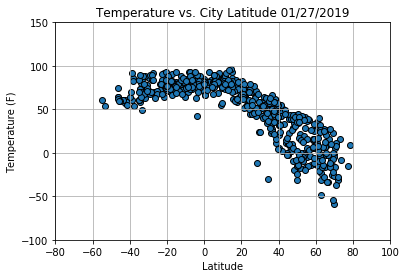

In [30]:
#Create scatter plot for temperature vs. latitude
plt.scatter(weather_data["Latitude"], weather_data["Temperature (˚F)"], marker="o", edgecolor="black", linewidths=1)

# Incorporate the other graph properties
plt.title(f"Temperature vs. City Latitude {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-100, 150])

# Save the figure
plt.savefig('Latitude_Temperature.png')

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

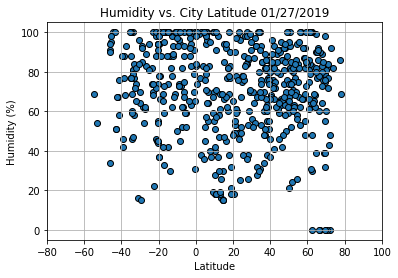

In [31]:
#Create scatter plot for humidity vs. latitude
plt.scatter(weather_data["Latitude"], weather_data["Humidity (%)"], marker="o", edgecolor="black", linewidths=1)

# Incorporate the other graph properties
plt.title(f"Humidity vs. City Latitude {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 105])

# Save the figure
plt.savefig('Latitude_Humidity.png')

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

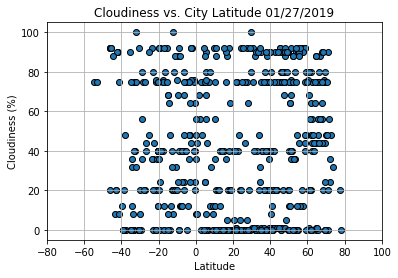

In [32]:
#Create scatter plot for cloudiness vs. latitude
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness (%)"], marker="o", edgecolor="black", linewidths=1)

# Incorporate the other graph properties
plt.title(f"Cloudiness vs. City Latitude {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 105])

# Save the figure
plt.savefig('Latitude_Cloudiness.png')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

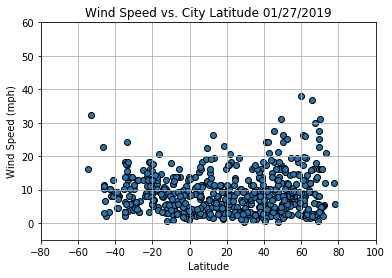

In [33]:
#Create scatter plot for wind speed vs. latitude
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed (mph)"], marker="o", edgecolor="black", linewidths=1)

# Incorporate the other graph properties
plt.title(f"Wind Speed vs. City Latitude {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 60])

# Save the figure
plt.savefig('Latitude_WindSpeed.png')

# Show plot
plt.show()